In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
headers = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
dataset = pd.read_csv("/home/leo/iris.data", encoding = "ISO-8859-1", decimal=",", header=None, names=headers)

In [3]:
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
for col in  dataset.columns[0:4]:
    dataset[col] = dataset[col].astype(float)

In [5]:
dataset.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [6]:
X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, 4]

In [7]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
X_clustered = kmeans.fit_predict(X)

In [10]:
results = dataset[['class']].copy()
results['clusterNumber'] = X_clustered
results

,class,clusterNumber
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
5,Iris-setosa,1
6,Iris-setosa,1
7,Iris-setosa,1
8,Iris-setosa,1
9,Iris-setosa,1


In [11]:
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue', 2: 'green'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

In [16]:
c1 = 0 # valor do índice da coluna, pode ser 0, 1 ou 2
c2 = 1
labels = ['sepal length', 'sepal width', 'petal length']
c1label = labels[c1]
c2label = labels[c2]
title = "Gráficos"

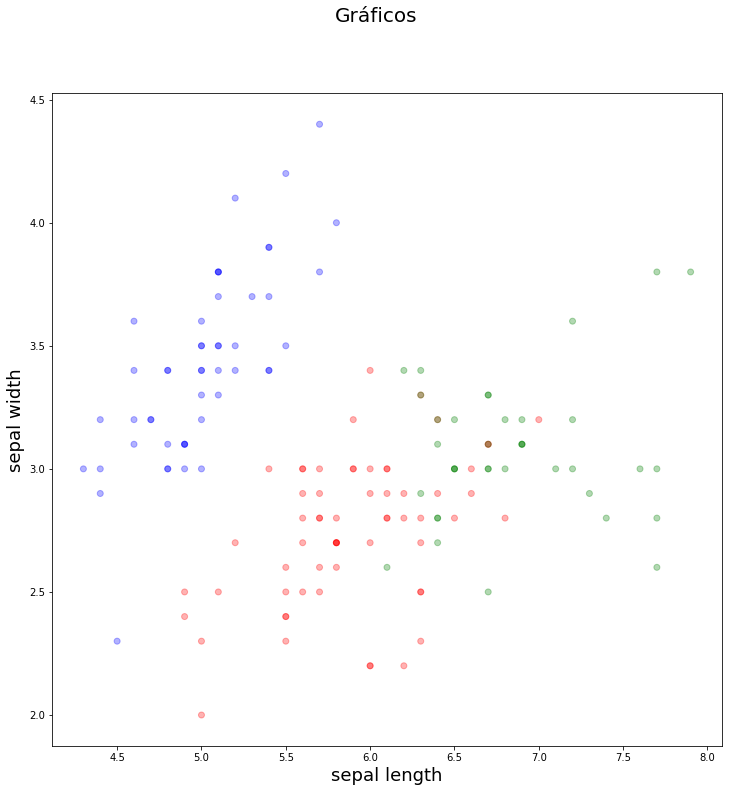

In [17]:
plt.figure(figsize = (12,12))
plt.scatter(X.iloc[:, c1],X.iloc[:, c2], c=label_color, alpha=0.3) 
plt.xlabel(c1label, fontsize=18)
plt.ylabel(c2label, fontsize=18)
plt.suptitle(title, fontsize=20)
plt.savefig(title + '.jpg')
plt.show()